<a href="https://colab.research.google.com/github/FatimaEzzedinee/ML-bachelor-course-labs-sp24/blob/main/04_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning SP 2023/2024

- Prof. Cesare Alippi
- Alvise Dei Rossi ([`alvise.dei.rossii@usi.ch`](mailto:alvise.dei.rossi@usi.ch))<br>
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>
- Alessandro Manenti ([`alessandro.manenti@usi.ch`](mailto:alessandro.manenti@usi.ch))

---
# Lab 04: Deep Learning

___

In this lab we will see:

0. Theoretical recap of neural networks;
1. How to implement, train and evaluate a Fully Connected Neural Network (FCNN) for **regression** with `PyTorch`;
2. How to implement, train and evaluate a Convolutional Neural Network (CNN) for **classification** with `PyTorch`.

---


# 0. Theoretical Recap of Neural Networks

The core component of neural networks is the neuron, which is composed of a perceptron and an activation function:

$$
f(x; \boldsymbol \theta) =  h( x^T \boldsymbol \theta).
$$

The main idea behind neural networks is to compose neurons in two different ways:

1. by taking many neurons __in parallel__;
2. by composing many subsequent __layers__ of neurons;

The result is a network of neurons that take data as input, and compute sequential transformations until the desired result is produced as output.

![alt text](https://res.cloudinary.com/practicaldev/image/fetch/s--4XiAvCCB--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/1200/1%2AYgJ6SYO7byjfCmt5uV0PmA.png)

---

We can write the output of the hidden layer as:

$$
\begin{bmatrix}
h_0 \\
h_1 \\
h_2 \\
\vdots\\
h_l
\end{bmatrix}
=
h\left(
\begin{bmatrix}
w_{00} & w_{01} & w_{02} & \cdots & w_{0m} \\
w_{10} & w_{11} & w_{12} & \cdots & w_{1m} \\
w_{20} & w_{21} & w_{22} & \cdots & w_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
w_{l0} & w_{l1} & w_{l2} & \cdots & w_{lm} \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\vdots\\
x_m
\end{bmatrix}
+
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots\\
b_l
\end{bmatrix}
\right)
$$

In short, we write the output of a __layer__ of neurons as:
$$
H = h(Wx + b_w)
$$

_NB: without the activation function a layer is a simple affine trasformation._

We can compute the output of the network doing the same calculation for the  "Output" neurons, with the difference that their input is not $X$, as for the hidden neurons, but it is the output $H$ of the last hidden layer. The output layer can be written as:

$$
Y = \sigma(VH + b_v)
$$

(note that $V$ is a different matrix of parameters).

Finally, stacking the two layers simply means __composing__ them together, so that the whole neural network can be written as:

$$
\hat y = f(x;\boldsymbol \theta = \{W, b_w, V, b_v\}) = \sigma\left(V h(Wx + b_w)  + b_v\right)
$$

---
Neural networks are trained with __stochastic gradient descent__ (SGD). The key idea behind SGD is to update all the parameters of the network at the same time, based on how each parameter contributed to the __loss__ function $L( \boldsymbol \theta)$.

The generalized update rule reads:

$$
{\boldsymbol \theta}^{i+1} = {\boldsymbol \theta}^{i} - \varepsilon \frac{\partial L({\boldsymbol \theta})}{\partial {\boldsymbol \theta}}\bigg\vert_{{\boldsymbol \theta} = {\boldsymbol \theta}^i}
$$

where $\varepsilon$ is again called __learning rate__.

At each iteration:

1. We take a **batch** ($x_n$, $y_n$) of samples from the dataset;
2. We compute the **output** $\hat ($y_n$) of the network for each sample in the batch;
3. We compute an empirical estimate of the **loss** $L$ on the batch;
4. We compute the **gradient** of the loss with respect to the parameters of the network (**backpropagation**);
5. We update the parameters of the network with the **optimizer** rule (e.g., SGD, Adam, RMSprop, etc.).

Look at Tutorial 1 to refresh your memory on Gradient Descent and Backpropagation. There we implemented the gradients of the loss function with respect to the parameters of the network by hand. In this lab we will use `PyTorch` to do this for us.

---
When training neural networks for **regression**, we often take the loss to be the __mean squared error function__:

$$
L({\boldsymbol \theta}) =  \frac{1}{N} \sum_{n=1}^N \left(y_n - \hat y_n\right)^2
$$

or the __mean absolute error function__:

$$
L({\boldsymbol \theta}) =  \frac{1}{N} \sum_{n=1}^N \left|y_n - \hat y_n\right|
$$


When training neural networks for **classification**, we often take the loss to be the __cross-entropy error function__:

$$
L({\boldsymbol \theta}) =  -\frac{1}{N} \sum_{n=1}^N \sum_{c=1}^C y_{nc} \log(\hat y_{nc})
$$

where $C$ is the number of classes, and $y_{nc}$ is the true label of the $n$-th sample for the $c$-th class.

---

# A) Fully Connected Neural Network (FCNN) for Regression

To build our neural network we will use [PyTorch](https://pytorch.org/), one of the most popular deep learning libraries for Python (others being [JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html) and [TensorFlow](https://www.tensorflow.org/)).

PyTorch provides a huge number of functions, like Numpy, that can be used to manipulate arrays, but offers a great advantages w.r.t. Numpy:  the library implements __automatic differentiation__, meaning that the most analytically complex step of training, the computation of the gradient, is handled for you.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png)

## A.1) Collect and prepare the data

Let's start with a toy regression problem.

To use PyTorch, you'll need to import the necessary libraries. The standard are:
- `torch.nn` contains various neural network modules
- `torch.optim` provides optimization algorithms.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# # We can seeif a GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

# # For Mac users you can try
# device = torch.device('mps' if torch.backends.mps.is_available() else "cpu") 
print(device)

cuda


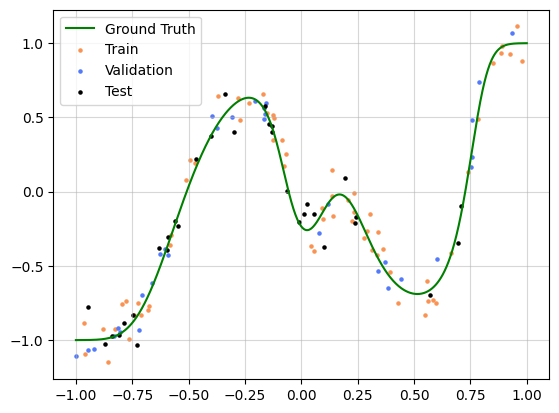

In [2]:
# Create dataset
import numpy as np
import matplotlib.pyplot as plt

Ct = '#fa9352'
Cv = '#527afa'

def ground_truth(x):
    return np.tanh(5*x**5 + np.sinc(2*x) - 0.2*np.sin((x-0.5)*5)/(x-0.5) - np.exp(-(x**2)/0.02)) # Very complex function

def generate_data(n_samples=512, seed=42):
    np.random.seed(seed)
    x = np.random.rand(n_samples) * 2 - 1
    # x = np.linspace(-1, 1, n_samples)
    y = ground_truth(x) + np.random.randn(n_samples) * 0.1
    return torch.tensor(x, dtype=torch.float).reshape(-1, 1), torch.tensor(y, dtype=torch.float).reshape(-1, 1)

ground_truth_x = torch.linspace(-1, 1, 1000).reshape(-1, 1)
ground_truth_y = ground_truth(ground_truth_x)
plt.plot(ground_truth_x, ground_truth_y, label='Ground Truth', color='g')

x_train, y_train = generate_data(n_samples=64, seed=0)
x_val, y_val = generate_data(n_samples=32, seed=1)
x_test, y_test = generate_data(n_samples=32, seed=2)

plt.scatter(x_train, y_train, s=5, label='Train', color=Ct)
plt.scatter(x_val, y_val, s=5, label='Validation', color=Cv)
plt.scatter(x_test, y_test, s=5, label='Test', color='k')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## A.2) Define the network

To build a neural network in PyTorch, you need to define a class that inherits from `torch.nn.Module`. This class should have two main methods:
- `__init__` method, where you define the layers of the network;
- `forward` method, where you define the forward pass of the network.

In [3]:
class FCNN(nn.Module):
    def __init__(self):     # Here we define the structure of the network
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc2 = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):   # Here we define the forward pass
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

model = FCNN().to(device) # Create the model and move to device (GPU or CPU)

Voilà! You have a neural network.

How do you think it performs on the data?

Well? Why / Why not?

torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([1000, 1])


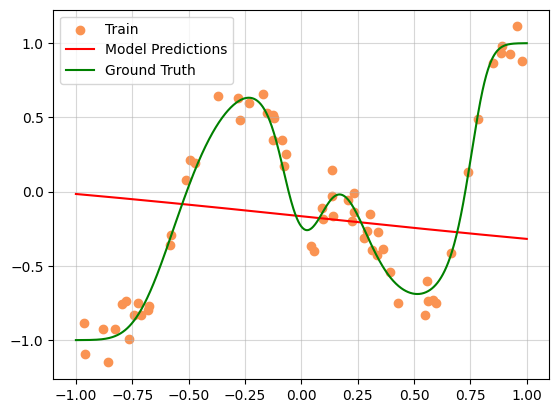

In [4]:
y_pred = model(ground_truth_x.to(device)) # Forward pass

print(x_train.shape, y_train.shape, y_pred.shape)


plt.scatter(x_train, y_train, label='Train', color=Ct)
plt.plot(ground_truth_x, y_pred.detach().cpu(), label='Model Predictions', color='r')
plt.plot(ground_truth_x, ground_truth_y, label='Ground Truth', color='g')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## A.3) Train the network

To train the network, you need to:
- Define an optimizer (e.g., `torch.optim.SGD`, `torch.optim.Adam`, etc.);
- Define a loss function (e.g., `torch.nn.MSELoss`, `torch.nn.L1Loss`, etc.);
- Loop over the dataset, and for each batch:
    - Compute the output of the network;
    - Compute the loss;
    - Compute the gradients of the loss with respect to the parameters of the network;
    - Update the parameters of the network with the optimizer.

    
We will use the `torch.optim.Adam` optimizer and the `torch.nn.MSELoss` loss function.

torch.Size([64, 1]) torch.Size([64, 1])
Epoch: 0 - Loss: 0.3553987741470337
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1])
torc

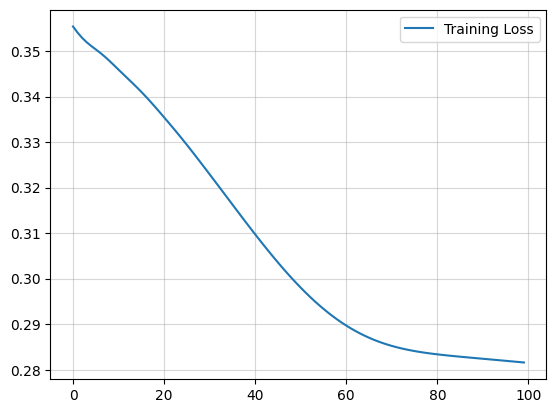

In [5]:
# Reinitalize the model
model = FCNN().to(device)

# Training
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

training_losses = []

n_epochs = 100
# Training loop
for epoch in range(n_epochs):
    optimizer.zero_grad()               # Zero the gradients

    y_pred = model(x_train.to(device))             # Forward pass
    print(x_train.shape, y_pred.shape)
    loss = criterion(y_pred, y_train.to(device))   # Compute the loss
    loss.backward()                     # Compute the gradients
    optimizer.step()                    # Update the weights

    if epoch % 100 == 0:
        print(f'Epoch: {epoch} - Loss: {loss.item()}')
    training_losses.append(loss.item()) # Save the loss for plotting

plt.plot(training_losses, label='Training Loss')

plt.legend()
plt.grid(alpha=0.5)
plt.show()

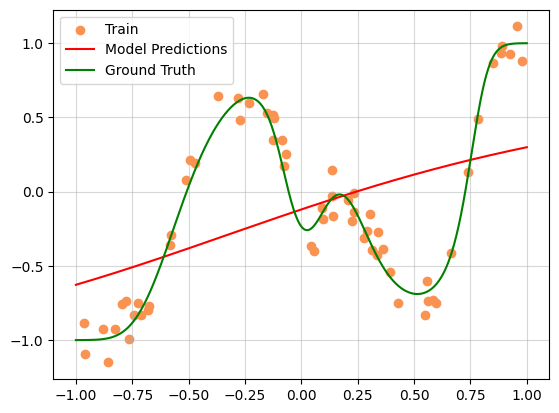

In [6]:
# Plot the model predictions
y_pred = model(ground_truth_x.to(device)) # Forward pass
plt.scatter(x_train, y_train, label='Train', color=Ct)
plt.plot(ground_truth_x, y_pred.detach().cpu(), label='Model Predictions', color='r')
plt.plot(ground_truth_x, ground_truth_y, label='Ground Truth', color='g')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

Is it better? Now try to:
1. Change `n_epochs`
2. Change `lr`

### Exercise: Bigger model

Now, let's try to build a bigger model, in order to do so modify the `__init__` method of the `FCNN` class to allow for a different number of neurons in the hidden layer.




In [7]:
# class FCNN(nn.Module):
#     def __init__(...):     # Here we define the structure of the network
#         super(FCNN, self).__init__()
#         self.fc1 = ...
#         self.fc2 = ...
#         self.activation = nn.Sigmoid()

#     def forward(self, x):   # Here we define the forward pass
#         x = self.activation(self.fc1(x))
#         x = self.fc2(x)
#         return x

### Solution:

In [8]:
class FCNN(nn.Module):
    def __init__(self, hidden_dim):     # Here we define the structure of the network
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):   # Here we define the forward pass
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

### Train loop

As we are building a bigger model, **can we use the same training loop or we should monitor something else?** Why/Why not?

In [9]:
def train(model, criterion, optimizer, x_train, y_train, x_val, y_val, n_epochs, eval_freq, device):
    training_losses = []
    validation_losses = []

    for epoch in range(n_epochs):
        model.train()                       # Set the model to training mode, this is important for some layers (e.g. dropout)
        optimizer.zero_grad()               # Zero the gradients

        y_pred = model(x_train.to(device))             # Forward pass
        print(y_pred.shape, x_train.shape, y_train.shape)
        loss = criterion(y_pred, y_train.to(device))   # Compute the loss
        loss.backward()                     # Compute the gradients
        optimizer.step()                    # Update the weights

        training_losses.append(loss.item()) # Save the loss for plotting

        # Validation
        model.eval()                        # Set the model to evaluation mode
        if epoch % eval_freq == 0:
            with torch.no_grad():            # No need to compute the gradients
                y_val_pred = model(x_val.to(device))
                val_loss = criterion(y_val_pred, y_val.to(device))
                validation_losses.append(val_loss.item())

            print(f'Epoch {epoch}, Train Loss {loss.item()}')
            print(f'Validation Loss {val_loss.item()}')
            print('')
    return training_losses, validation_losses

torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
Epoch 0, Train Loss 0.6144935488700867
Validation Loss 0.5712883472442627

torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch

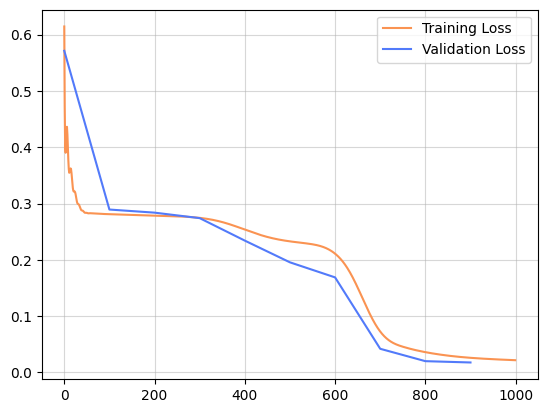

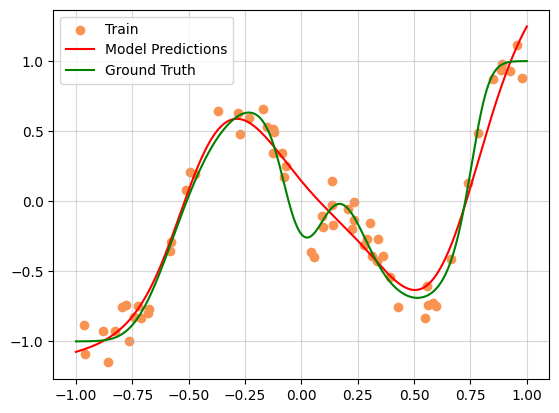

In [10]:
# Reinitalize the model
model = FCNN(hidden_dim=32).to(device) # Create the model and move to device (GPU or CPU)

# Training
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
eval_freq = 100
n_epochs = 1000
# Let's train the model
training_losses, validation_losses = train(model, criterion, optimizer, x_train, y_train, x_val, y_val, n_epochs, eval_freq, device)

plt.plot(training_losses, label='Training Loss', color=Ct)
plt.plot(np.arange(0, n_epochs, 100), validation_losses, label='Validation Loss', color=Cv)

plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Plot the model predictions
y_pred = model(ground_truth_x.to(device)) # Forward pass
plt.scatter(x_train, y_train, label='Train', color=Ct)
plt.plot(ground_truth_x, y_pred.detach().cpu(), label='Model Predictions', color='r')
plt.plot(ground_truth_x, ground_truth_y, label='Ground Truth', color='g')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

With almost zero effort or knowledge we achieved pretty good results! N.B. this is not always the case, Deep Learning is not magic, but it is a powerful tool.

### Exercise 1: Change the activation function to ReLU and see what happens.

### Exercise 2: Arbitrary big model

Go back and look at the definition of the model. How would you change it to have an arbitrary number of hidden layers and neurons in each layer?

Usefull if you want to try different configurations of the model, without having to write a new class for each configuration.

## A.4) Arbitrarly big model with `nn.ModuleList`

`nn.ModuleList` is a container for modules that can be accessed by index (similar to Python lists).

 It's useful when you need to create and manage a variable number of modules, or when the forward pass through the network involves more complex, non-sequential operations.

In [11]:
class FCNN(nn.Module):
    def __init__(self, dims):
        super(FCNN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(dims)-1):
            self.layers.append(nn.Linear(dims[i], dims[i+1]))
        self.activation = nn.Sigmoid()

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))
        x = self.layers[-1](x)
        return x

torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
Epoch 0, Train Loss 0.5737007260322571
Validation Loss 0.5591470003128052

torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1])
torch.Size([64, 1]) torch

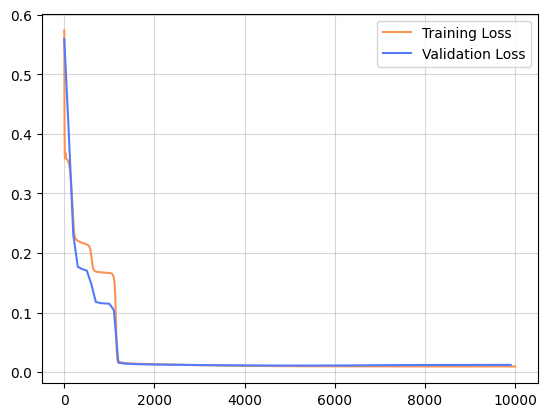

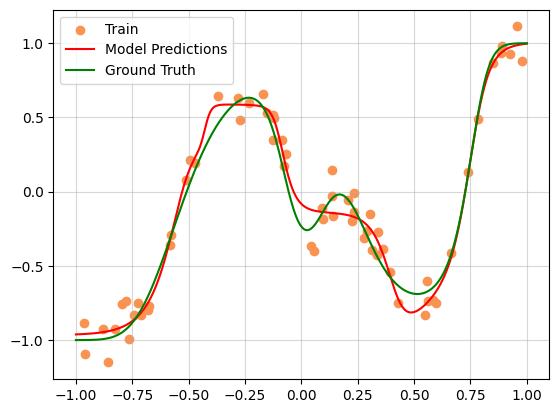

In [12]:
# Let's train the model
dims = [1, 4, 4, 4, 1]
n_epochs = 10000

model = FCNN(dims).to(device)

# Training
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

training_losses, validation_losses = train(model, criterion, optimizer, x_train, y_train, x_val, y_val, n_epochs, eval_freq, device)

plt.plot(training_losses, label='Training Loss', color=Ct)
plt.plot(np.arange(0, n_epochs, 100), validation_losses, label='Validation Loss', color=Cv)

plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Plot the model predictions
y_pred = model(ground_truth_x.to(device)) # Forward pass
plt.scatter(x_train, y_train, label='Train', color=Ct)
plt.plot(ground_truth_x, y_pred.detach().cpu(), label='Model Predictions', color='r')
plt.plot(ground_truth_x, ground_truth_y, label='Ground Truth', color='g')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

Now experiment with it to gain confidence with PyTorch and neural networks.

# B) Convolutional Neural Network (CNN) for Classification

In this part we will explore how to build a Convolutional Neural Network (CNN) for a classification task.

We will also explore three important concepts in Deep Learning:
- `torch.utils.data.Dataset` **and** `torch.utils.data.DataLoader`: classes to load and preprocess the data in torch;
- **Unbalanced Datasets**: a common problem in classification tasks, where the number of samples in each class is not equal.
- **Data Augmentation**: a technique to artificially increase the size of the training set by applying transformations to the input data;
- **Early Stopping**: a technique to prevent overfitting by stopping the training when the validation loss increases for a certain number of epochs.


We will use the `torchvision` library to load and preprocess the data.

But first, a brief recap on CNNs.

![alt text](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)


CNNs were first introduced by Kunihiko Fukushima in 1980, and were later popularized by Y. LeCun, when he successfully applied backpropagation to train CNNs on MNIST.

In CNNs, we use our **prior knowledge** about the problem (i.e., the data are translational invariant), imposing that neurons **share** some weights (i.e., the convolutional kernels).


# B.1) Load and preprocess the data

We will use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

### B.1.1) Downoad the data

100%|██████████| 170498071/170498071 [00:17<00:00, 9809848.52it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


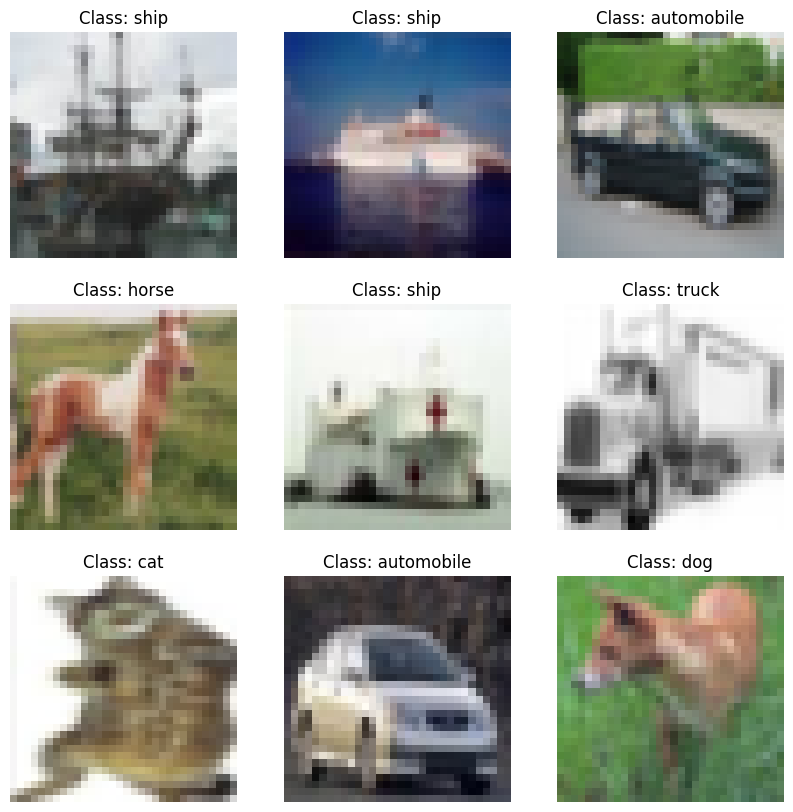

In [13]:
# Download the dataset
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations to apply to the images and download the dataset
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transformations)
cifar10_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transformations)
# Split in test and validation
cifar10_val, cifar10_test = torch.utils.data.random_split(cifar10_test, [5000, 5000])

# Plot 9 random images from the dataset
def plot_9_random_images(dataset, with_predictions=False, model=None):
    class_label_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))                            # Create a figure and a grid of subplots
    for i in range(3):
        for j in range(3):
            random_indeces = np.random.randint(len(dataset))            # Get 9 random indeces
            x, y = dataset[random_indeces]
            axes[i, j].imshow(x.permute(1, 2, 0).numpy() * 0.5 + 0.5)   # Rearrange the dimensions of the tensor from (C, H, W) to (H, W, C),
            # which is the expected format for Matplotlib's imshow function.
            # The * 0.5 + 0.5 operation is used to unnormalize the pixel values
            if with_predictions:
                axes[i, j].set_title(f'Class: {class_label_map[y]}, Pred: {class_label_map[model(x).argmax().item()]}')
            else:
                axes[i, j].set_title(f'Class: {class_label_map[y]}')
            axes[i, j].axis('off')
    plt.show()

plot_9_random_images(cifar10_train)

Now we make the dataset unbalanced by removing some samples from the classes "frog" and "truck".

An unbalanced dataset is a dataset where the number of samples in each class is not equal (usually very different). This is a common problem in classification tasks, and can lead to poor performance of the classifier.

Why do you think this is bad?

In [14]:
# Remove some samples from the "cat" and "truck" classes in the training set with probability P
P = 0.2
unbalanced_train_data = [(x, y) for x, y in cifar10_train if y not in [3, 9]]
unbalanced_train_data += [(x, y) for x, y in cifar10_train if y in [3, 9] and torch.rand(1) < P]

### B.1.2) Data Augmentation

Data augmentation is a technique to artificially increase the size of the training set by applying transformations to the input data. This can help the model generalize better to unseen data.

We will use the `torchvision.transforms` module to apply some transformations to the input data.

In [15]:
data_augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Horizontal flip with probability 0.5
    transforms.RandomRotation(10),      # Rotate the image by a random angle between -10 and 10 degrees
    transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0))  # Take a random crop of the original image with an area between 80% to 100% of the original image
])

### B.1.3) `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`

Now that we have the data as a list and the data augmentation transformation, we can use the `torch.utils.data.Dataset` class to create a PyTorch dataset. Look [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for a deeper tutorial on how to use `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`.

A `Dataset` is a Python class that represents a dataset. It should implement three methods:

- `__init__`: where you specify how or where to load the dataset;
- `__getitem__`: where you specify how to get the $i$-th sample of the dataset;
- `__len__`: where you specify how to get the length of the dataset.


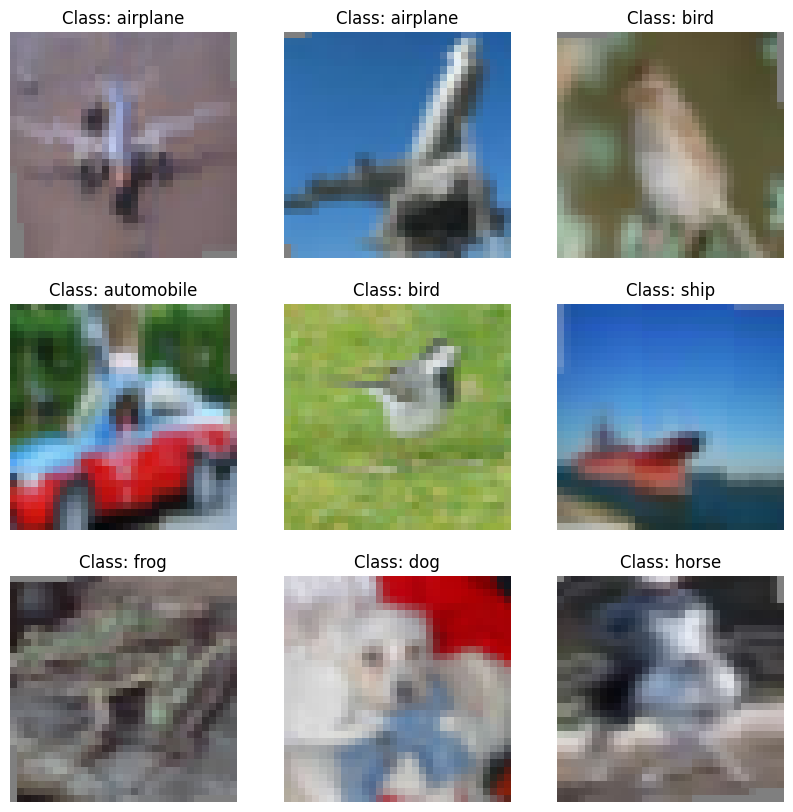

In [16]:
# Create new Dataset objects for the unbalanced training and test datasets
class UnbalancedDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.data[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.data)

unbalanced_dataset = UnbalancedDataset(unbalanced_train_data, data_augmentation_transform) # The data augmentation is only applied whenever a sample is requested

# Plot 9 random images from the unbalanced dataset
plot_9_random_images(unbalanced_dataset)

`Dataset` are used to define how to load and preprocess the data, while `DataLoader` are used to actually load the data in batches.

In [17]:
BATCH_SIZE = 64

train_loader = torch.utils.data.DataLoader(unbalanced_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=BATCH_SIZE, shuffle=False)

# The dataloader can be used as an iterator
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([64, 3, 32, 32]) torch.Size([64])


## B.2) Define the CNN

As before, to build a CNN in PyTorch, we define a class that inherits from `torch.nn.Module`. This class has the same two main methods:

- `__init__` method, where you define the layers of the network;
- `forward` method, where you define the forward pass of the network.


In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)  # Can we change the number of output channels?
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=64 * 4 * 4, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        self.activation = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = self.pool(self.activation(self.conv3(x)))

        x = x.view(-1, 64 * 4 * 4)  # Flatten the tensor

        x = self.activation(self.fc1(x))

        x = self.fc2(x)

        return x # We don't apply the softmax here because it is included in the torch implementation of the cross entropy loss function

## B.3) Unbalanced Datasets

How would you try to solve the problem of unbalanced datasets?

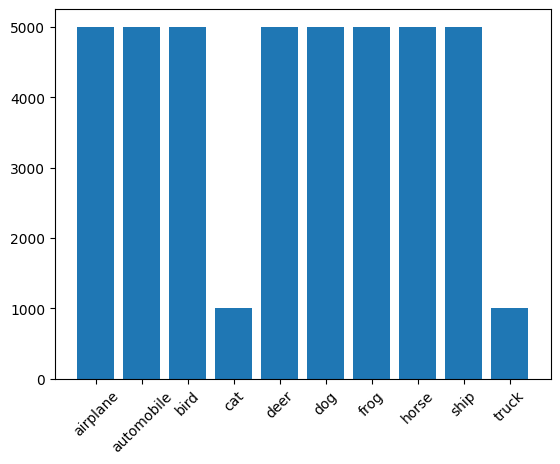

In [19]:
# Let's see how unbalanced the dataset is
class_label_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_counter = torch.zeros(10)
for _, y in unbalanced_train_data:
    class_counter[y] += 1

plt.bar(np.arange(10), class_counter)
plt.xticks(np.arange(10), class_label_map, rotation=45)
plt.show()


There are various techniques to deal with unbalanced datasets, such as:

- **Resampling**: This involves either oversampling the minority class or undersampling the majority class to balance the dataset.
- **Data Augmentation**: This involves artificially increasing the size of the training set by applying transformations to the input data.
- **Weighted Loss**: This involves assigning different weights to the classes in the loss function, so that the model pays more attention to the minority class.

We will use the **Weighted Loss** technique.


The trick consists in __re-weighting__ the loss function, so that the error on rare samples will count more than the error on common samples:

$$
L_{\textrm{reweighted}}(y, f(X; W)) =
\begin{cases}
\lambda_0 L(y, f(X; W))\textrm{, if } y=0 \\
\lambda_1 L(y, f(X; W))\textrm{, if } y=1
\end{cases}
$$

Ideally, $\lambda_0$ and $\lambda_1$ should represent how rare the respective classes are in the dataset.
A common way of computing the two values automatically is as:

$$
\lambda_i = \frac{\textrm{\# samples in dataset}}{\textrm{\# classes}\cdot\textrm{\# samples of class } i}
$$


In [20]:
lambda_i = class_counter.sum() / (10 * class_counter)

criterion = torch.nn.CrossEntropyLoss(weight=lambda_i).to(device)

## B.4) Train the CNN

In [21]:
def train(model, criterion, optimizer, train_loader, val_loader, n_epochs, eval_freq, device):
    training_losses = []
    validation_losses = []

    for epoch in range(n_epochs):
        model.train()                       # Set the model to training mode, this is important for some layers (e.g. dropout)

        for x, y in train_loader:           # Access the training data
            optimizer.zero_grad()           # Zero the gradients
            x, y = x.to(device), y.to(device)
            y_pred = model(x)               # Forward pass

            loss = criterion(y_pred, y)
            loss.backward()                 # Compute the gradients
            optimizer.step()                # Update the weights

            training_losses.append(loss.item()) # Save the loss for plotting

        # Validation
        model.eval()                        # Set the model to evaluation mode
        if epoch % eval_freq == 0:
            with torch.no_grad():            # No need to compute the gradients
                val_loss = 0
                for x, y in val_loader:
                    x, y = x.to(device), y.to(device)
                    y_val_pred = model(x)
                    val_loss += criterion(y_val_pred, y)
                validation_losses.append(val_loss.item() / len(val_loader))

            print(f'Epoch {epoch}, Train Loss {training_losses[-1]:.4f}')
            print(f'Validation Loss {validation_losses[-1]:.4f}')
            print('')

    return training_losses, validation_losses

In [22]:
# Reinitalize the model
model = CNN().to(device)

# Training
optimizer = optim.Adam(model.parameters(), lr=0.001)

eval_freq = 1
n_epochs = 3

training_losses, validation_losses = train(model, criterion, optimizer, train_loader, val_loader, n_epochs, eval_freq, device)

Epoch 0, Train Loss 1.3013
Validation Loss 1.3510

Epoch 1, Train Loss 1.3161
Validation Loss 1.3226

Epoch 2, Train Loss 1.0713
Validation Loss 1.2193



In [23]:
# Test the accuracy on the test set
test_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=BATCH_SIZE, shuffle=False)

correct = 0
total = 0
model.eval()
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        _, predicted = torch.max(y_pred, dim=1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')



Accuracy of the network on the 10000 test images: 61.18%


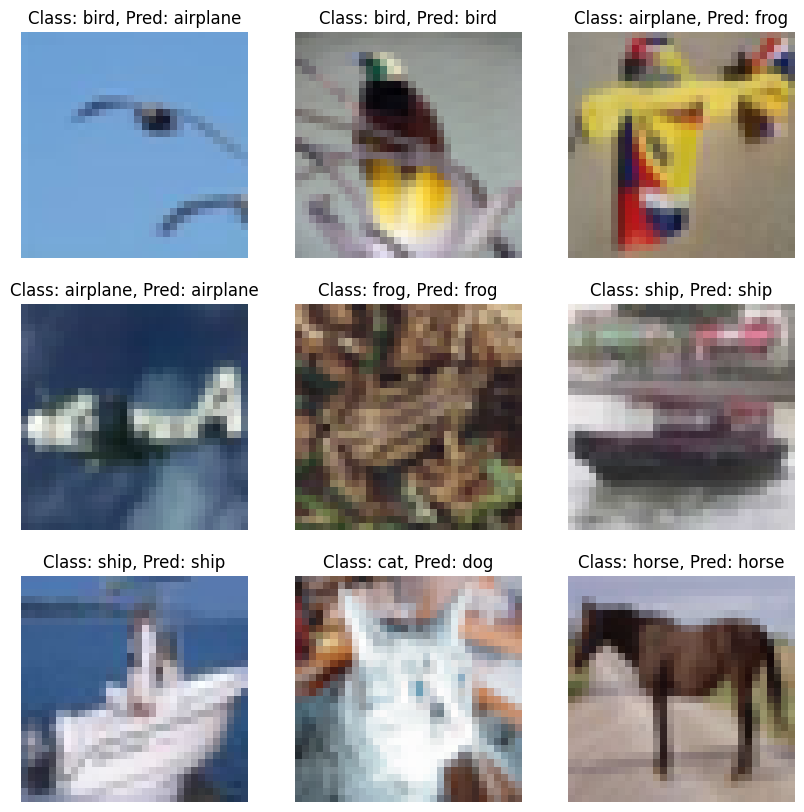

In [24]:
plot_9_random_images(cifar10_test, with_predictions=True, model=model.cpu())

As an exercise, try to:

1. Plot the confusion matrix of the model on the test set
2. Use the whole dataset and not the unbalanced version we created
3. Change the learning rate and the number of training epochs
4. Change the model (maybe look the Dropout regularization technique)
